<a href="https://colab.research.google.com/github/estrella-mooney/ma-learning-python/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [15]:
df = pd.read_csv('water_potability_clean_using_mean.csv')

In [16]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
# print the total size
print(len(df))
#print the test size
print(len(test))
#prtint the train size
print(len(train))

3276
656
2620


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3276 non-null   int64  
 1   ph               3276 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          3276 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3276 non-null   float64
 9   Turbidity        3276 non-null   float64
 10  Potability       3276 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 281.7 KB


In [19]:
features = ['ph', 'Sulfate', 'Organic_carbon', 'Chloramines', 'Solids', 'Conductivity', 'Turbidity' ]
label = ['Potability']

X_train = train[features]
y_train = train[label]


X_test = test[features]
y_test = test[label]


In [20]:
# alternative way of writing the code boave
# iloc allows us to select columns by their id's
#X_train = train.iloc[:,1:-1]
#y_train = train['Potability']


#X_test = test.iloc[:,1:-1]
#y_test = test['Potability']


In [21]:
# build the model

In [22]:
##### All Need to do is REPLACE THIS WITH  TREE
from sklearn import tree
# create a variable called logreg
beachtree = tree.DecisionTreeClassifier(random_state=42)
# we will then fit the model (line of best fit with out train)
beachtree.fit(X_train, y_train)
y_pred = beachtree.predict(X_test)

In [23]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[270, 142],
       [136, 108]])

In [24]:
from sklearn.metrics import accuracy_score
#calculate accuracy score
accuracy_score(y_test, y_pred)

0.5762195121951219

Text(0.5, 427.9555555555555, 'Predicted label')

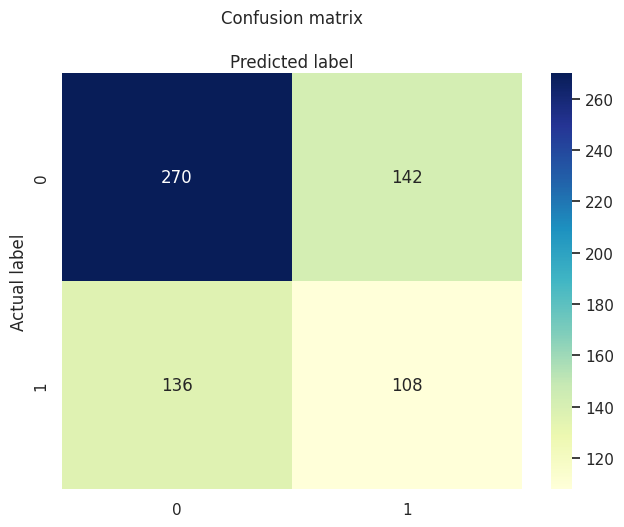

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[Text(0.2898153998931579, 0.9868421052631579, 'x[1] <= 257.304\ngini = 0.478\nsamples = 2620\nvalue = [1586, 1034]'),
 Text(0.010750061079892499, 0.9605263157894737, 'x[0] <= 6.099\ngini = 0.379\nsamples = 67\nvalue = [17, 50]'),
 Text(0.005863669679941363, 0.9342105263157895, 'x[3] <= 10.153\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.003909113119960909, 0.9078947368421053, 'x[1] <= 250.402\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.0019545565599804545, 0.881578947368421, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.005863669679941363, 0.881578947368421, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.007818226239921818, 0.9078947368421053, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.015636452479843636, 0.9342105263157895, 'x[4] <= 13628.173\ngini = 0.256\nsamples = 53\nvalue = [8, 45]'),
 Text(0.011727339359882726, 0.9078947368421053, 'x[5] <= 431.815\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.009772782799902272, 0.881578947368421,

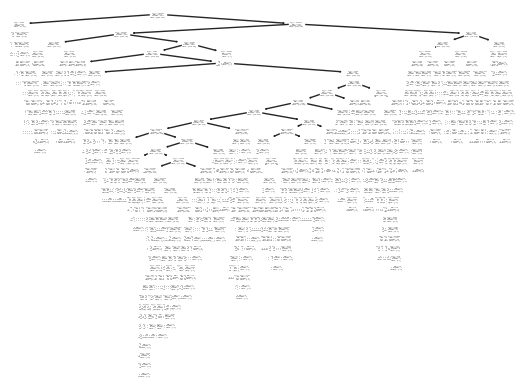

In [26]:
tree.plot_tree(beachtree)